#### Importando as bibliotecas necessárias

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Carregando o dataset

In [36]:
df = pd.read_csv('DoseMaterialCortical2x2.csv',  sep = ';')

In [37]:
df2 = pd.read_csv('15MV_DoseMaterialCortical5x5.csv',  sep = ';')

In [38]:
df3 = pd.read_csv('15MV_DoseMaterialCortical10x10.csv',  sep = ';')

#### Tratando os dados, separando uma única coluna '# TOPAS Version: 3.7' em quatro: 'x', 'y', 'z' e 'Dose'

In [39]:
df['x'], df['y'], df['z'], df['Dose'] = df['# TOPAS Version: 3.7'].str.split(',', 4).str
del df['# TOPAS Version: 3.7']

C:\Users\Larissa\AppData\Local\Temp/ipykernel_16616/4088738462.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['x'], df['y'], df['z'], df['Dose'] = df['# TOPAS Version: 3.7'].str.split(',', 4).str


In [40]:
df2['x'], df2['y'], df2['z'], df2['Dose'] = df2['# TOPAS Version: 3.7'].str.split(',', 4).str
del df2['# TOPAS Version: 3.7']

C:\Users\Larissa\AppData\Local\Temp/ipykernel_16616/1975224425.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df2['x'], df2['y'], df2['z'], df2['Dose'] = df2['# TOPAS Version: 3.7'].str.split(',', 4).str


In [41]:
df3['x'], df3['y'], df3['z'], df3['Dose'] = df3['# TOPAS Version: 3.7'].str.split(',', 4).str
del df3['# TOPAS Version: 3.7']

C:\Users\Larissa\AppData\Local\Temp/ipykernel_16616/3174952459.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df3['x'], df3['y'], df3['z'], df3['Dose'] = df3['# TOPAS Version: 3.7'].str.split(',', 4).str


#### Deixando claro as informações sobre os bins

In [27]:
print(df['x'][3])
print(df['x'][4])
print(df['x'][5])

# X in 30 bins of 0.5 cm
# Y in 30 bins of 0.5 cm
# Z in 130 bins of 0.1 cm


#### Removendo as primeiras linhas que não contêm dado numérico

In [42]:
df = df.iloc[7:]

In [43]:
df2 = df2.iloc[7:]

In [44]:
df3 = df3.iloc[7:]

#### Transformando os dados de cada coluna em números

In [45]:
df['x'] = df['x'].astype(int)
df['y'] = df['y'].astype(int)
df['z'] = df['z'].astype(int)
df['Dose'] = df['Dose'].astype(float)

In [46]:
df2['x'] = df2['x'].astype(int)
df2['y'] = df2['y'].astype(int)
df2['z'] = df2['z'].astype(int)
df2['Dose'] = df2['Dose'].astype(float)

In [47]:
df3['x'] = df3['x'].astype(int)
df3['y'] = df3['y'].astype(int)
df3['z'] = df3['z'].astype(int)
df3['Dose'] = df3['Dose'].astype(float)

#### Normalizando a dose

In [48]:
df['Dose'] = df['Dose'] / df['Dose'].max()

In [49]:
df2['Dose'] = df2['Dose'] / df2['Dose'].max()

In [50]:
df3['Dose'] = df3['Dose'] / df3['Dose'].max()

#### Encontrando a mediana de acordo com o número de bins

In [51]:
mediana = int(df['x'].median()) 

In [52]:
mediana2 = int(df2['x'].median()) 

In [53]:
mediana3 = int(df3['x'].median()) 

#### Selecionando apenas as linhas com valores de 'x' e 'y' iguais a mediana

In [54]:
novodf = df.loc[df['x'] == mediana]

In [55]:
novodf2 = df.loc[df2['x'] == mediana2]

In [56]:
novodf3 = df.loc[df3['x'] == mediana3]

In [57]:
novodf2 = novodf.loc[novodf['y'] == mediana]

In [59]:
novodf22 = novodf2.loc[novodf2['y'] == mediana2]

In [60]:
novodf23 = novodf3.loc[novodf3['y'] == mediana3]

#### Construindo o gráfico

* Input para o usuário entrar com os nomes dos eixos e o título do gráfico

In [11]:
titulo = input("Título do gráfico: ")
eixox  = input("Nome do eixo x: ")
eixoy  = input("Nome do eixo y: ")

Título do gráfico: a
Nome do eixo x: a
Nome do eixo y: a


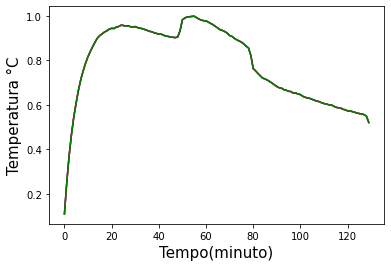

In [65]:
plt.plot(novodf2['z'], novodf2['Dose'], color = 'blue')
plt.plot(novodf22['z'], novodf22['Dose'], color = 'red')
plt.plot(novodf23['z'], novodf23['Dose'], color = 'green')
plt.xlabel('Tempo(minuto)', fontsize=15)
plt.ylabel('Temperatura °C', fontsize=15)
plt.show()